# Image Classification with CNN

Use the CIFAR 100 dataset to build a CNN to perform image detection

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
# Load data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

In [5]:
# Reshape, force datatype, and normalize data
from tensorflow.keras.utils import to_categorical
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255

y_train_OHE = to_categorical(y_train)
y_test_OHE = to_categorical(y_test)

In [6]:
# Build model
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(32, 32, 3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16, (3,3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(3,3), padding='same'))
model.add(Conv2D(16, (3,3)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(3,3), padding='same'))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(100))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 activation_4 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 16)          4624      
                                                                 
 activation_5 (Activation)   (None, 8, 8, 16)          0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 3, 16)         0         
 2D)                                                  

In [7]:
history = model.fit(X_train, y_train_OHE, validation_split=0.2, epochs=25, batch_size=400, verbose=1)

Epoch 1/25
100/100 [==============================] - 11s 104ms/step - loss: 4.4409 - accuracy: 0.0305 - val_loss: 4.2263 - val_accuracy: 0.0565
Epoch 2/25
100/100 [==============================] - 10s 99ms/step - loss: 4.0622 - accuracy: 0.0789 - val_loss: 3.9398 - val_accuracy: 0.0985
Epoch 3/25
100/100 [==============================] - 11s 106ms/step - loss: 3.8253 - accuracy: 0.1145 - val_loss: 3.7909 - val_accuracy: 0.1248
Epoch 4/25
100/100 [==============================] - 10s 102ms/step - loss: 3.7020 - accuracy: 0.1358 - val_loss: 3.6867 - val_accuracy: 0.1379
Epoch 5/25
100/100 [==============================] - 10s 99ms/step - loss: 3.6107 - accuracy: 0.1506 - val_loss: 3.6004 - val_accuracy: 0.1495
Epoch 6/25
100/100 [==============================] - 10s 99ms/step - loss: 3.5336 - accuracy: 0.1626 - val_loss: 3.5330 - val_accuracy: 0.1656
Epoch 7/25
100/100 [==============================] - 10s 98ms/step - loss: 3.4708 - accuracy: 0.1726 - val_loss: 3.4909 - val_accura

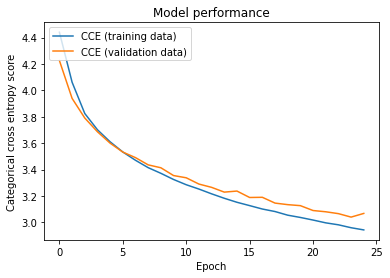

In [8]:
plt.plot(history.history['loss'], label='CCE (training data)')
plt.plot(history.history['val_loss'], label='CCE (validation data)')
plt.title('Model performance')
plt.ylabel('Categorical cross entropy score')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [9]:
# Model performance on test data
test_loss, test_acc = model.evaluate(X_test, y_test_OHE)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 3.0539 - accuracy: 0.2457
Test loss 3.053915023803711
Test accuracy 0.24570000171661377


In [10]:
# Create list of labels, taken from https://towardsdatascience.com/cifar-100-pre-processing-for-image-recognition-task-68015b43d658
fine_labels = [
            'apple',
            'aquarium_fish',
            'baby',
            'bear',
            'beaver',
            'bed',
            'bee',
            'beetle',
            'bicycle',
            'bottle',
            'bowl',
            'boy',
            'bridge',
            'bus',
            'butterfly',
            'camel',
            'can',
            'castle',
            'caterpillar',
            'cattle',
            'chair',
            'chimpanzee',
            'clock',
            'cloud',
            'cockroach',
            'couch',
            'crab',
            'crocodile',
            'cup',
            'dinosaur',
            'dolphin',
            'elephant',
            'flatfish',
            'forest',
            'fox',
            'girl',
            'hamster',
            'house',
            'kangaroo',
            'computer_keyboard',
            'lamp',
            'lawn_mower',
            'leopard',
            'lion',
            'lizard',
            'lobster',
            'man',
            'maple_tree',
            'motorcycle',
            'mountain',
            'mouse',
            'mushroom',
            'oak_tree',
            'orange',
            'orchid',
            'otter',
            'palm_tree',
            'pear',
            'pickup_truck',
            'pine_tree',
            'plain',
            'plate',
            'poppy',
            'porcupine',
            'possum',
            'rabbit',
            'raccoon',
            'ray',
            'road',
            'rocket',
            'rose',
            'sea',
            'seal',
            'shark',
            'shrew',
            'skunk',
            'skyscraper',
            'snail',
            'snake',
            'spider',
            'squirrel',
            'streetcar',
            'sunflower',
            'sweet_pepper',
            'table',
            'tank',
            'telephone',
            'television',
            'tiger',
            'tractor',
            'train',
            'trout',
            'tulip',
            'turtle',
            'wardrobe',
            'whale',
            'willow_tree',
            'wolf',
            'woman',
            'worm']

In [20]:
# Randomly select from predictions
import random
predictions = model.predict(X_test)
random_indices = random.sample(range(0,len(predictions)), 5)
random_predictions = predictions[random_indices]
img_labels = []
for i in range(0,5):
    img_labels.append(np.argmax(random_predictions[i]))

313/313 [==============================] - 1s 3ms/step


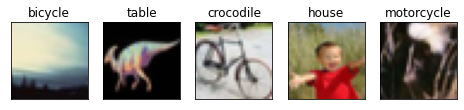

In [21]:
fig=plt.figure(figsize=(8, 10))
for i, img in enumerate(img_labels):
    fig.add_subplot(1, 5, i+1)
    image = X_test[img]
    image = image.reshape(32,32,3)
    plt.imshow(image)
    plt.title(fine_labels[img])
    plt.xticks([])
    plt.yticks([])
plt.show()